In [31]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt
from math import log
from scipy.integrate import odeint
%matplotlib inline

# Weight Change and Predator-Prey Models

Lab Objective: We use IVP methods to study two dynamical systems. The first system is a weight change model based on thermodynamics and kinematics. The second model looks at the relationship between a predator and its prey. Further details are found at http://www.acme.byu.edu/wp-content/uploads/2017/08/Weightloss-1.pdf. 

## Problem 1

In [32]:
r0 = 5 # Initial rabbit population
w0 = 3 # Initial wolf population
# Define rabbit growth paramters
a = 1.0
alpha = 0.5
# Define wolf growth parameters
c = 0.75
gamma = 0.25
t_f = 20 # How long we want to run the model
y0 = [r0, w0]
# Initialize time and output arrays needed for the ode solver
t = np.linspace(0, t_f, 5*t_f)
y = np.zeros((len(t), len(y0)))
y[0,:] = y0

In [33]:
def predator_prey(t, y, a, alpha, c, gamma):
    '''
    Parameters:
    --------------
    t: time variable.
    y: a tuple of length len(y0) representing current wolf and rabbit ← 
    populations at time t.
    a, alpha, c, gamma: growth parameters. These are keyword arguments and← 
             can be of any length.
        Return:Return a tuple corresponding to the Predator-Prey model.
    '''
    r = y[0]
    w = y[1]
    return [r*(a - alpha*w), w*(-c + gamma*r)]

In [34]:

# Fixed Constants:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis  
beta_TEF = 0.1 # Thermic Effect of Feeding 
K = 0

def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F , p * EB / rho_L])

def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

## Problem 2

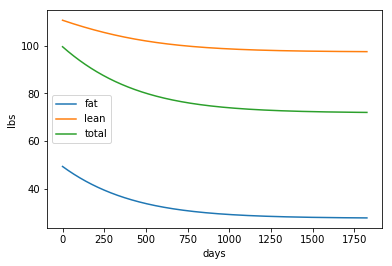

In [35]:
#Problem 2
height = 1.7272
weight = 72.5748
sex = "female"
age = 38
EI_initial = 2143
EI_change = 2025
PAL_initial = 1.4
PAL_change = 1.5

f0 = fat_mass(weight, age, height, sex)
l0 = weight - f0
y0 = [f0, l0]

t_f = 5*365
t = np.linspace(0, t_f, 5*t_f)
y = np.zeros((len(t), len(y0)))
y[0,:] = y0

K = (1. / PAL_initial - beta_AT) * EI_initial - gamma_F * f0 - gamma_L * l0
weight_ode = lambda t, y: weight_odesystem(t, y, EI_change, PAL_change)
w_o_solver = ode(weight_ode).set_integrator('dopri5')
w_o_solver.set_initial_value(y0, 0)

for j in range(1, len(t)):
    y[j,:] = w_o_solver.integrate((t[j]))
    
plt.plot(t, y[:,0]*2.20462, label='fat')
plt.plot(t, y[:,1]*2.20462, label='lean')
plt.plot(t, y[:, 0]*2.20462 + y[:, 1], label="total")
plt.legend()
plt.xlabel('days')
plt.ylabel('lbs')
plt.show()

# Problem 3

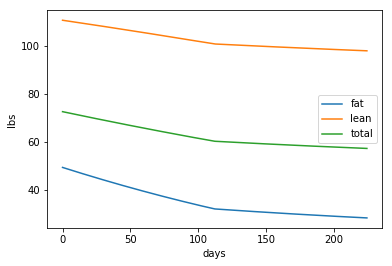

In [36]:
#Problem 3

#first 16 weeks
height = 1.7272
weight = 72.5748
sex = "female"
age = 38
EI_initial_0 = 2143
EI_change_0 = 1600
PAL_initial_0 = 1.4
PAL_change_0 = 1.7

f0 = fat_mass(weight, age, height, sex)
l0 = weight - f0
y0 = [f0, l0]

t_all = np.linspace(0, 32*7, 5*32*7)
t_f_1 = 7*16*5
t_1 = t_all[:t_f_1]
y1 = np.zeros((len(t_1), len(y0)))
y1[0,:] = y0

K = (1. / PAL_initial_0 - beta_AT) * EI_initial_0 - gamma_F * f0 - gamma_L * l0
weight_ode = lambda t, y: weight_odesystem(t, y, EI_change_0, PAL_change_0)
w_o_solver = ode(weight_ode).set_integrator('dopri5')
w_o_solver.set_initial_value(y0, t_1[0])

for j in range(1, len(t_1)):
    y1[j,:] = w_o_solver.integrate((t_1[j]))
    

#2nd 16 weeks
EI_initial_1 = EI_change_0
EI_change_1 = 2025
PAL_initial_1 = PAL_change_0
PAL_change_1 = 1.6
f1 = y1[-1, 0]
l1 = y1[-1, 1]
m0 = [f1, l1]


t_2 = t_all[t_f_1:]
y2 = np.zeros((len(t_2), len(y0)))
y2[0,:] = m0

# K = (1. / PAL_initial_1 - beta_AT) * EI_initial_1 - gamma_F * f0 - gamma_L * l0
weight_ode = lambda t, y: weight_odesystem(t, y, EI_change_1, PAL_change_1)
w_o_solver = ode(weight_ode).set_integrator('dopri5')
w_o_solver.set_initial_value(m0, t_2[0])

for j in range(1, len(t_2)):
    y2[j,:] = w_o_solver.integrate((t_2[j]))
    
y = np.vstack((y1, y2))
plt.plot(t_all, y[:, 0]*2.20462, label='fat')
plt.plot(t_all, y[:, 1]*2.20462, label='lean')
plt.plot(t_all, y[:, 0] + y[:, 1], label="total")
plt.legend()
plt.xlabel('days')
plt.ylabel('lbs')
plt.show()

#convert back to lbs

## Problem 4

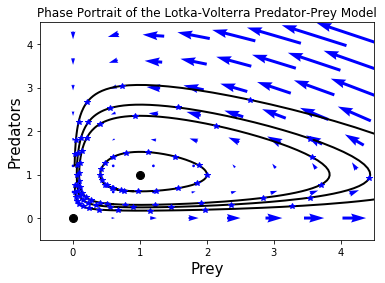

In [37]:
#Problem 4
a, b = 0., 13.
alpha = 1. / 3
dim = 2
y0 = np.array([1 / 2., 1 / 3.])# used in the built in IVP solver.
y0_1 = np.array([1 / 2., 3 / 4.])
y0_2 = np.array([1 / 16., 3 / 4.])
y0_3 = np.array([1 / 40., 3 / 4.])

def Lotka_Volterra(y, x):
 return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])

subintervals = 200 
# Using the built in ode solver
Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))
Y_1 = odeint(Lotka_Volterra, y0_1, np.linspace(a, b, subintervals))
Y_2 = odeint(Lotka_Volterra, y0_2, np.linspace(a, b, subintervals))
Y_3 = odeint(Lotka_Volterra, y0_3, np.linspace(a, b, subintervals))

# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
U, V = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)

# Plot the 2 Equilibrium points
plt.plot(1, 1, 'ok', markersize=8)
plt.plot(0, 0, 'ok', markersize=8)


# Plot the solution in phase space
plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0)
plt.plot(Y[::10,0], Y[::10,1], '*b')

plt.plot(Y_1[:,0], Y_1[:,1], '-k', linewidth=2.0)
plt.plot(Y_1[::10,0], Y_1[::10,1], '*b')

plt.plot(Y_2[:,0], Y_2[:,1], '-k', linewidth=2.0)
plt.plot(Y_2[::10,0], Y_2[::10,1], '*b')

plt.plot(Y_3[:,0], Y_3[:,1], '-k', linewidth=2.0)
plt.plot(Y_3[::10,0], Y_3[::10,1], '*b')

plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()

## Problem 5

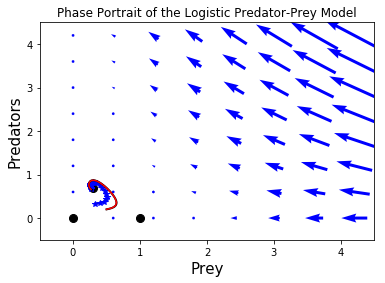

In [40]:
#Problem 5
a, b = 0., 13.
alpha_1 = 1.
beta_1 = 0.3
alpha_2 = 1.
beta_2 = 1.1
dim = 2
# used in the built in IVP solver.
y0_1 = np.array([1 / 3., 1 / 3.])
y0_2 = np.array([1 / 2., 1 / 5.])


def Lotka_Volterra(y, x, alpha, beta):
 return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])

subintervals = 200 
# Using the built in ode solver
Y_1_1 = odeint(Lotka_Volterra, y0_1, np.linspace(a, b, subintervals), (alpha_1, beta_1))
Y_1_2 = odeint(Lotka_Volterra, y0_2, np.linspace(a, b, subintervals), (alpha_1, beta_1))
# Y_2 = odeint(Lotka_Volterra, y0_2, np.linspace(a, b, subintervals), (alpha_2, beta_2))

# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
U_1, V_1 = Lotka_Volterra((Y1, Y2), 0, alpha_1, beta_1)
# U_2, V_2 = Lotka_Volterra((Y1, Y2), 0, alpha_2, beta_2)
Q_1 = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U_1[::3, ::3], V_1[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
# Q_2 = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U_2[::3, ::3], V_2[::3, ::3], pivot='mid', color='r', units='dots',width=3.)


# Plot the 2 Equilibrium points
plt.plot(1, 0, 'ok', markersize=8)
plt.plot(0, 0, 'ok', markersize=8)
plt.plot(3/10., 7/10., 'ok', markersize=8)


# Plot the solution in phase space
plt.plot(Y_1_1[:,0], Y_1_1[:,1], '-k', linewidth=2.0)
plt.plot(Y_1_1[::10,0], Y_1_1[::10,1], '*b')

plt.plot(Y_1_2[:,0], Y_1_2[:,1], '-k', linewidth=2.0)
plt.plot(Y_1_2[::10,0], Y_1_2[::10,1], 'r')

# plt.plot(Y_2[:,0], Y_2[:,1], '-k', linewidth=2.0)
# plt.plot(Y_2[::10,0], Y_2[::10,1], '*b')

plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Logistic Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()

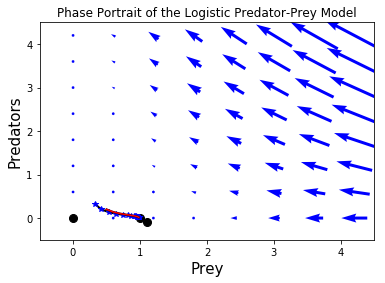

In [41]:
Y_2_1 = odeint(Lotka_Volterra, y0_1, np.linspace(a, b, subintervals), (alpha_2, beta_2))
Y_2_2 = odeint(Lotka_Volterra, y0_2, np.linspace(a, b, subintervals), (alpha_2, beta_2))

# Plot the direction field
Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True, copy=False)
# U_1, V_1 = Lotka_Volterra((Y1, Y2), 0, alpha_1, beta_1)
U_2, V_2 = Lotka_Volterra((Y1, Y2), 0, alpha_2, beta_2)
Q_1 = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U_1[::3, ::3], V_1[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
# Q_2 = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U_2[::3, ::3], V_2[::3, ::3], pivot='mid', color='r', units='dots',width=3.)


# Plot the 2 Equilibrium points
plt.plot(1, 0, 'ok', markersize=8)
plt.plot(11/10, -1/10., 'ok', markersize=8)
plt.plot(0, 0, 'ok', markersize=8)


# Plot the solution in phase space
plt.plot(Y_2_1[:,0], Y_2_1[:,1], '-k', linewidth=2.0)
plt.plot(Y_2_1[::10,0], Y_2_1[::10,1], '*b')

plt.plot(Y_2_2[:,0], Y_2_2[:,1], '-k', linewidth=2.0)
plt.plot(Y_2_2[::10,0], Y_2_2[::10,1], 'r')


plt.axis([-.5, 4.5, -.5, 4.5])
plt.title("Phase Portrait of the Logistic Predator-Prey Model")
plt.xlabel('Prey',fontsize=15)
plt.ylabel('Predators',fontsize=15)
plt.show()